# Exploratory Data Analysis - Delivery Trips

The goal of this notebook is to understand the data and identify patterns that affect delivery performance, particularly late deliveries.

Let's start by loading the Delivery Trips dataset and taking a look at the first few rows.

The dataset contains the following columns:

1. **trip_id**: Unique identifier for each delivery trip
2. **distance_km**: Distance traveled in kilometers
3. **estimated_duration_min**: Estimated delivery time in minutes
4. **actual_duration_min**: Actual delivery time in minutes
5. **num_stops**: Number of stops during the delivery
6. **vehicle_type**: Type of vehicle used (van, truck_small, truck_large)
7. **vehicle_age_years**: Age of the vehicle in years
8. **load_weight_kg**: Weight of the cargo in kilograms
9. **departure_hour**: Hour of the day when delivery started (0-23)
10. **day_of_week**: Day of the week
11. **weather_condition**: Weather conditions during delivery (clear, rain, snow, windy)
12. **region**: Delivery region (urban, suburban, rural)
13. **is_late_delivery**: Target variable - whether delivery was late (1) or on time (0)

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

DATASET = Path("../data/delivery_trips.csv")

delivery_trips = pd.read_csv(DATASET)
delivery_trips.head()

,trip_id,distance_km,estimated_duration_min,actual_duration_min,num_stops,vehicle_type,vehicle_age_years,load_weight_kg,departure_hour,day_of_week,weather_condition,region,is_late_delivery
0,1,19.35,37.2,55.9,17,van,2,118.6,15,Wed,rain,suburban,1
1,2,47.59,119.3,123.2,9,van,7,1171.4,1,Thu,clear,urban,0
2,3,36.87,110.7,102.1,2,van,13,1583.8,7,Sun,clear,urban,0
3,4,30.33,86.8,92.1,18,truck_large,5,83.7,5,Wed,rain,suburban,0
4,5,8.64,28.0,5.0,9,van,4,1121.9,15,Sun,rain,rural,0


Now, let's get the summary statistics for the features in our dataset.


In [2]:
delivery_trips.describe(include="all")

,trip_id,distance_km,estimated_duration_min,actual_duration_min,num_stops,vehicle_type,vehicle_age_years,load_weight_kg,departure_hour,day_of_week,weather_condition,region,is_late_delivery
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.000000
unique,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,7,4,3,NaN
top,NaN,NaN,NaN,NaN,NaN,van,NaN,NaN,NaN,Thu,clear,urban,NaN
freq,NaN,NaN,NaN,NaN,NaN,511,NaN,NaN,NaN,161,543,515,NaN
mean,500.500000,25.022710,63.075600,63.448400,12.798000,NaN,7.512000,1039.523900,11.628000,NaN,NaN,NaN,0.226000
std,288.819436,14.314758,38.074217,38.586594,7.033823,NaN,3.999982,566.489748,6.925141,NaN,NaN,NaN,0.418448
min,1.000000,1.230000,5.000000,5.000000,1.000000,NaN,1.000000,55.700000,0.000000,NaN,NaN,NaN,0.000000
25%,250.750000,12.560000,30.025000,31.525000,7.000000,NaN,4.000000,565.925000,6.000000,NaN,NaN,NaN,0.000000
50%,500.500000,25.345000,60.000000,60.600000,13.000000,NaN,8.000000,1055.050000,11.000000,NaN,NaN,NaN,0.000000
75%,750.250000,37.470000,91.625000,92.575000,19.000000,NaN,11.000000,1539.850000,18.000000,NaN,NaN,NaN,0.000000


Let's now display the distribution of values for the categorical columns in our data:

- **vehicle_type**: The type of vehicle used for delivery (van, truck_small, truck_large)
- **day_of_week**: The day of the week when delivery occurred (Mon-Sun)
- **weather_condition**: Weather conditions during delivery (clear, rain, snow, windy)
- **region**: The region where delivery was made (urban, suburban, rural)
- **is_late_delivery**: Whether the delivery was late (1) or on time (0) - our target variable

In [3]:
vehicle_type_distribution = delivery_trips["vehicle_type"].value_counts()
day_of_week_distribution = delivery_trips["day_of_week"].value_counts()
weather_distribution = delivery_trips["weather_condition"].value_counts()
region_distribution = delivery_trips["region"].value_counts()
late_delivery_distribution = delivery_trips["is_late_delivery"].value_counts()

print("Vehicle Type Distribution:")
print(vehicle_type_distribution, end="\n\n")

print("Day of Week Distribution:")
print(day_of_week_distribution, end="\n\n")

print("Weather Condition Distribution:")
print(weather_distribution, end="\n\n")

print("Region Distribution:")
print(region_distribution, end="\n\n")

print("Late Delivery Distribution:")
print(late_delivery_distribution)

Vehicle Type Distribution:
vehicle_type
van            511
truck_small    284
truck_large    205
Name: count, dtype: int64

Day of Week Distribution:
day_of_week
Thu    161
Fri    161
Sun    154
Sat    140
Wed    132
Mon    132
Tue    120
Name: count, dtype: int64

Weather Condition Distribution:
weather_condition
clear    543
rain     268
windy     99
snow      90
Name: count, dtype: int64

Region Distribution:
region
urban       515
suburban    290
rural       195
Name: count, dtype: int64

Late Delivery Distribution:
is_late_delivery
0    774
1    226
Name: count, dtype: int64


Let's check the data types and look for any data quality issues:

In [4]:
# Display data types
print("Data Types:")
print(delivery_trips.dtypes, end="\n\n")

# Display basic info
print("Dataset Info:")
print(delivery_trips.info())

Data Types:
trip_id                     int64
distance_km               float64
estimated_duration_min    float64
actual_duration_min       float64
num_stops                   int64
vehicle_type               object
vehicle_age_years           int64
load_weight_kg            float64
departure_hour              int64
day_of_week                object
weather_condition          object
region                     object
is_late_delivery            int64
dtype: object

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trip_id                 1000 non-null   int64  
 1   distance_km             1000 non-null   float64
 2   estimated_duration_min  1000 non-null   float64
 3   actual_duration_min     1000 non-null   float64
 4   num_stops               1000 non-null   int64  
 5   vehicle_type            1000 non-nu

Next, let's check for any missing values in the dataset.


In [5]:
missing_values = delivery_trips.isna().sum()
print("Missing Values per Column:")
print(missing_values, end="\n\n")

print(f"Total missing values: {missing_values.sum()}")
print(f"Percentage of missing data: {(missing_values.sum() / (len(delivery_trips) * len(delivery_trips.columns))) * 100:.2f}%")

Missing Values per Column:
trip_id                   0
distance_km               0
estimated_duration_min    0
actual_duration_min       0
num_stops                 0
vehicle_type              0
vehicle_age_years         0
load_weight_kg            0
departure_hour            0
day_of_week               0
weather_condition         0
region                    0
is_late_delivery          0
dtype: int64

Total missing values: 0
Percentage of missing data: 0.00%


If there are missing values, we'll handle them appropriately. For categorical variables, we'll use the most frequent value. For numerical variables, we could use mean, median, or most frequent depending on the distribution. Let's use the most frequent value for simplicity in this initial exploration.

In [6]:
from sklearn.impute import SimpleImputer

# Only impute if there are missing values
if delivery_trips.isna().sum().sum() > 0:
    imputer = SimpleImputer(strategy="most_frequent")
    delivery_trips.iloc[:, :] = imputer.fit_transform(delivery_trips)
    print("Missing values have been imputed.")
else:
    print("No missing values found in the dataset.")

# Display the number of missing values after imputation
print("\nMissing values after imputation:")
print(delivery_trips.isna().sum())

No missing values found in the dataset.

Missing values after imputation:
trip_id                   0
distance_km               0
estimated_duration_min    0
actual_duration_min       0
num_stops                 0
vehicle_type              0
vehicle_age_years         0
load_weight_kg            0
departure_hour            0
day_of_week               0
weather_condition         0
region                    0
is_late_delivery          0
dtype: int64


Let's visualize the distribution of categorical features.


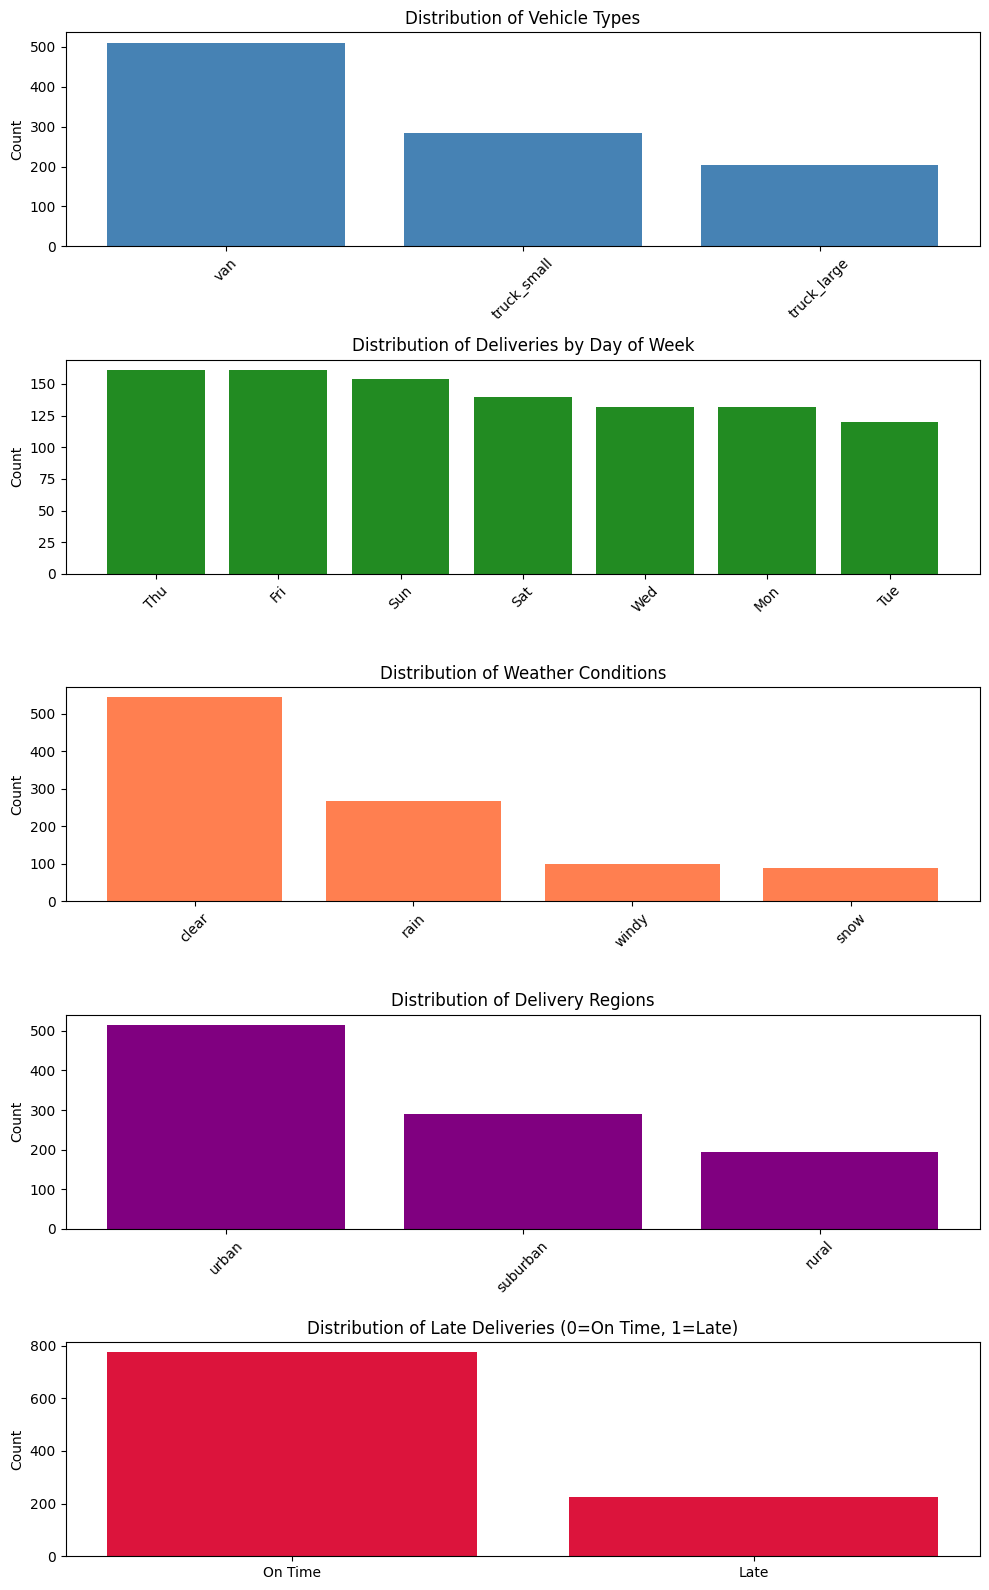

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 1, figsize=(10, 16))

axs[0].bar(vehicle_type_distribution.index, vehicle_type_distribution.values, color='steelblue')
axs[0].set_ylabel("Count")
axs[0].set_title("Distribution of Vehicle Types")
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(day_of_week_distribution.index, day_of_week_distribution.values, color='forestgreen')
axs[1].set_ylabel("Count")
axs[1].set_title("Distribution of Deliveries by Day of Week")
axs[1].tick_params(axis='x', rotation=45)

axs[2].bar(weather_distribution.index, weather_distribution.values, color='coral')
axs[2].set_ylabel("Count")
axs[2].set_title("Distribution of Weather Conditions")
axs[2].tick_params(axis='x', rotation=45)

axs[3].bar(region_distribution.index, region_distribution.values, color='purple')
axs[3].set_ylabel("Count")
axs[3].set_title("Distribution of Delivery Regions")
axs[3].tick_params(axis='x', rotation=45)

axs[4].bar(late_delivery_distribution.index, late_delivery_distribution.values, color='crimson')
axs[4].set_ylabel("Count")
axs[4].set_title("Distribution of Late Deliveries (0=On Time, 1=Late)")
axs[4].set_xticks([0, 1])
axs[4].set_xticklabels(['On Time', 'Late'])

plt.tight_layout()
plt.show()

Let's visualize the distribution of key numerical columns.

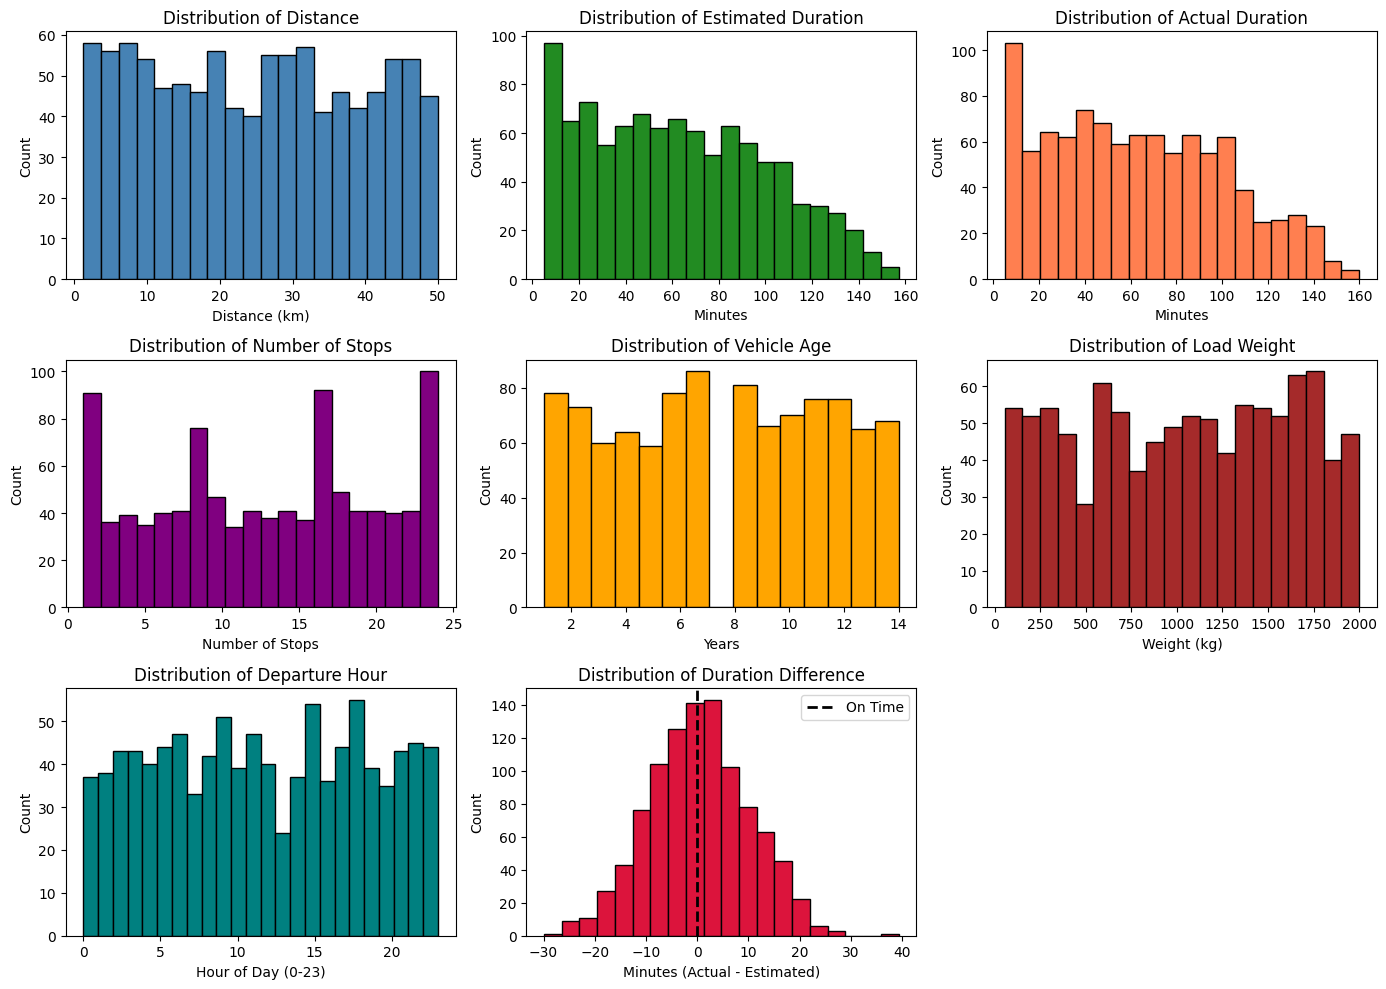

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(14, 10))

axs[0, 0].hist(delivery_trips["distance_km"], bins=20, color='steelblue', edgecolor='black')
axs[0, 0].set_ylabel("Count")
axs[0, 0].set_xlabel("Distance (km)")
axs[0, 0].set_title("Distribution of Distance")

axs[0, 1].hist(delivery_trips["estimated_duration_min"], bins=20, color='forestgreen', edgecolor='black')
axs[0, 1].set_ylabel("Count")
axs[0, 1].set_xlabel("Minutes")
axs[0, 1].set_title("Distribution of Estimated Duration")

axs[0, 2].hist(delivery_trips["actual_duration_min"], bins=20, color='coral', edgecolor='black')
axs[0, 2].set_ylabel("Count")
axs[0, 2].set_xlabel("Minutes")
axs[0, 2].set_title("Distribution of Actual Duration")

axs[1, 0].hist(delivery_trips["num_stops"], bins=20, color='purple', edgecolor='black')
axs[1, 0].set_ylabel("Count")
axs[1, 0].set_xlabel("Number of Stops")
axs[1, 0].set_title("Distribution of Number of Stops")

axs[1, 1].hist(delivery_trips["vehicle_age_years"], bins=15, color='orange', edgecolor='black')
axs[1, 1].set_ylabel("Count")
axs[1, 1].set_xlabel("Years")
axs[1, 1].set_title("Distribution of Vehicle Age")

axs[1, 2].hist(delivery_trips["load_weight_kg"], bins=20, color='brown', edgecolor='black')
axs[1, 2].set_ylabel("Count")
axs[1, 2].set_xlabel("Weight (kg)")
axs[1, 2].set_title("Distribution of Load Weight")

axs[2, 0].hist(delivery_trips["departure_hour"], bins=24, color='teal', edgecolor='black')
axs[2, 0].set_ylabel("Count")
axs[2, 0].set_xlabel("Hour of Day (0-23)")
axs[2, 0].set_title("Distribution of Departure Hour")

# Calculate duration difference (actual - estimated)
duration_diff = delivery_trips["actual_duration_min"] - delivery_trips["estimated_duration_min"]
axs[2, 1].hist(duration_diff, bins=20, color='crimson', edgecolor='black')
axs[2, 1].set_ylabel("Count")
axs[2, 1].set_xlabel("Minutes (Actual - Estimated)")
axs[2, 1].set_title("Distribution of Duration Difference")
axs[2, 1].axvline(x=0, color='black', linestyle='--', linewidth=2, label='On Time')
axs[2, 1].legend()

# Hide the last empty subplot
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()

Let's display the covariance matrix of the dataset. The "covariance" measures how changes in one variable are associated with changes in a second variable. In other words, the covariance measures the degree to which two variables are linearly associated.

Here are some examples of what we might expect to find:

1. **Positive covariance** between distance and duration suggests that longer distances are associated with longer delivery times.
2. **Positive covariance** between estimated_duration and actual_duration indicates they tend to move together.
3. **Covariance** between num_stops and duration can reveal if more stops are associated with longer delivery times.

In [9]:
delivery_trips.cov(numeric_only=True)

,trip_id,distance_km,estimated_duration_min,actual_duration_min,num_stops,vehicle_age_years,load_weight_kg,departure_hour,is_late_delivery
trip_id,83416.666667,-101.317743,-424.340240,-423.049149,7.152152,-29.872873,3949.167618,69.875876,2.033033
distance_km,-101.317743,204.912306,517.697480,505.036041,0.518015,1.016429,-262.814493,4.089888,-1.967230
estimated_duration_min,-424.340240,517.697480,1449.645971,1420.473404,-0.190019,3.392285,-766.989757,7.045469,-5.292478
actual_duration_min,-423.049149,505.036041,1420.473404,1488.925223,-0.701224,2.785805,-734.004651,8.265270,-2.626064
num_stops,7.152152,0.518015,-0.190019,-0.701224,49.474671,0.152577,-0.913285,1.398254,0.016669
vehicle_age_years,-29.872873,1.016429,3.392285,2.785805,0.152577,15.999856,-67.801438,-1.439976,-0.092805
load_weight_kg,3949.167618,-262.814493,-766.989757,-734.004651,-0.913285,-67.801438,320910.635094,42.981172,-2.376478
departure_hour,69.875876,4.089888,7.045469,8.265270,1.398254,-1.439976,42.981172,47.957574,-0.020949
is_late_delivery,2.033033,-1.967230,-5.292478,-2.626064,0.016669,-0.092805,-2.376478,-0.020949,0.175099


Let's now display the correlation matrix. "Correlation" measures both the strength and direction of the linear relationship between two variables. Correlation values range from -1 to 1, where:

- **1** indicates perfect positive correlation
- **-1** indicates perfect negative correlation
- **0** indicates no linear correlation

Key relationships to look for:
1. How do estimated vs actual duration correlate?
2. Does distance correlate with delivery duration?
3. Do vehicle characteristics (age, load weight) correlate with late deliveries?
4. How does the number of stops relate to delivery time?

In [10]:
correlation_matrix = delivery_trips.corr(numeric_only=True)
correlation_matrix

,trip_id,distance_km,estimated_duration_min,actual_duration_min,num_stops,vehicle_age_years,load_weight_kg,departure_hour,is_late_delivery
trip_id,1.000000,-0.024506,-0.038588,-0.037960,0.003521,-0.025858,0.024137,0.034936,0.016822
distance_km,-0.024506,1.000000,0.949863,0.914328,0.005145,0.017751,-0.032410,0.041257,-0.328420
estimated_duration_min,-0.038588,0.949863,1.000000,0.966865,-0.000710,0.022274,-0.035560,0.026721,-0.332190
actual_duration_min,-0.037960,0.914328,0.966865,1.000000,-0.002584,0.018049,-0.033579,0.030931,-0.162640
num_stops,0.003521,0.005145,-0.000710,-0.002584,1.000000,0.005423,-0.000229,0.028706,0.005663
vehicle_age_years,-0.025858,0.017751,0.022274,0.018049,0.005423,1.000000,-0.029922,-0.051984,-0.055446
load_weight_kg,0.024137,-0.032410,-0.035560,-0.033579,-0.000229,-0.029922,1.000000,0.010956,-0.010025
departure_hour,0.034936,0.041257,0.026721,0.030931,0.028706,-0.051984,0.010956,1.000000,-0.007229
is_late_delivery,0.016822,-0.328420,-0.332190,-0.162640,0.005663,-0.055446,-0.010025,-0.007229,1.000000


Let's analyze the relationship between late deliveries and various categorical features. This will help us understand which factors contribute most to delivery delays.

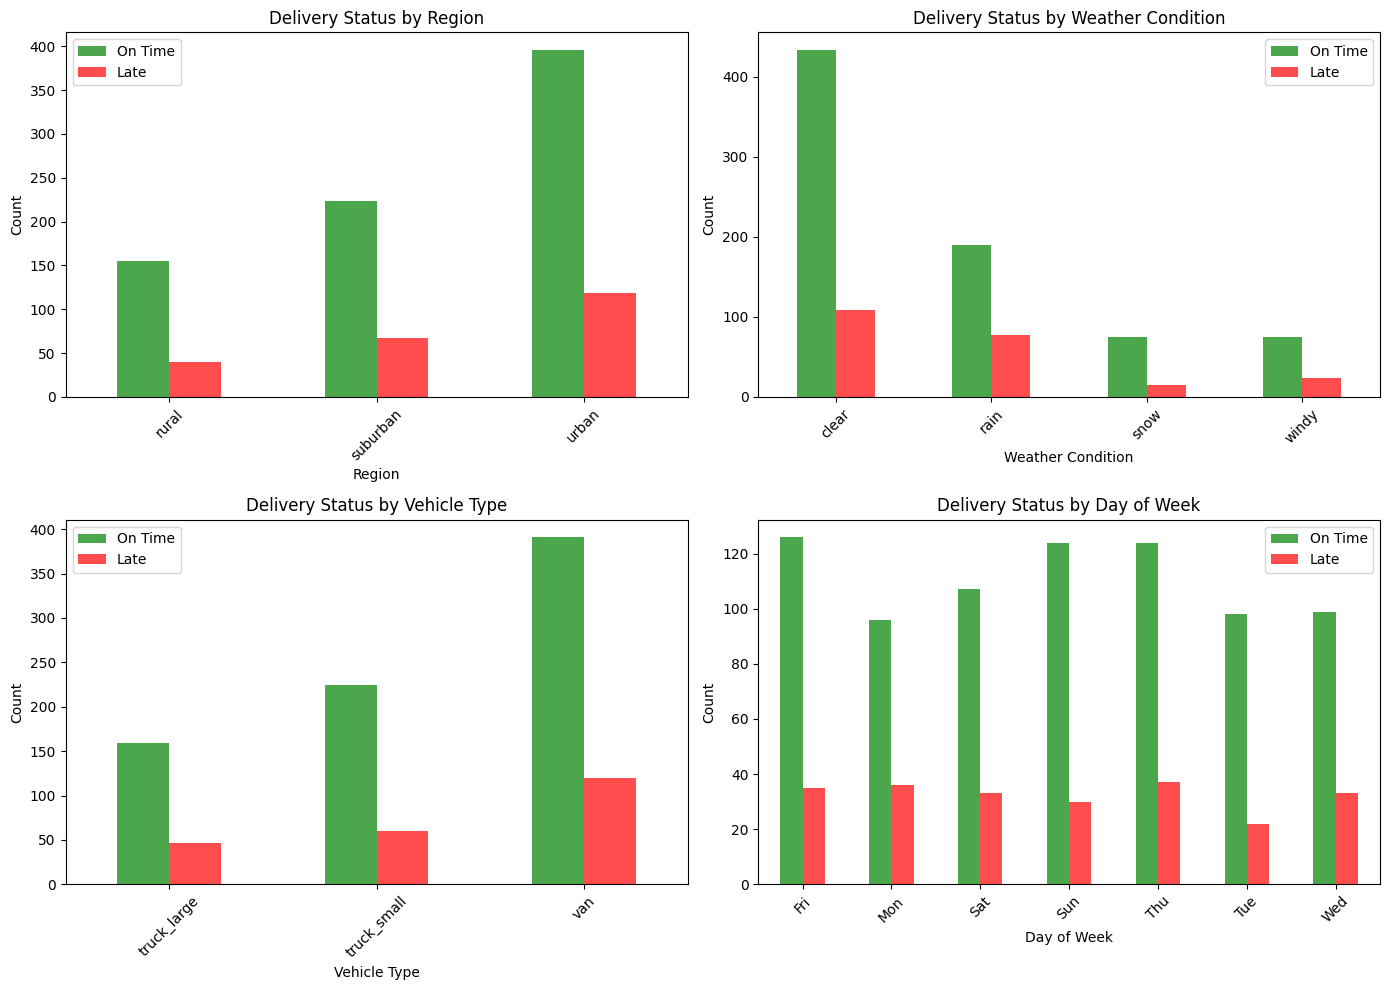

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Late deliveries by region
region_late = delivery_trips.groupby(['region', 'is_late_delivery']).size().unstack(fill_value=0)
region_late.plot(kind='bar', ax=axs[0, 0], color=['green', 'red'], alpha=0.7)
axs[0, 0].set_xlabel("Region")
axs[0, 0].set_ylabel("Count")
axs[0, 0].set_title("Delivery Status by Region")
axs[0, 0].legend(['On Time', 'Late'])
axs[0, 0].tick_params(axis='x', rotation=45)

# Late deliveries by weather condition
weather_late = delivery_trips.groupby(['weather_condition', 'is_late_delivery']).size().unstack(fill_value=0)
weather_late.plot(kind='bar', ax=axs[0, 1], color=['green', 'red'], alpha=0.7)
axs[0, 1].set_xlabel("Weather Condition")
axs[0, 1].set_ylabel("Count")
axs[0, 1].set_title("Delivery Status by Weather Condition")
axs[0, 1].legend(['On Time', 'Late'])
axs[0, 1].tick_params(axis='x', rotation=45)

# Late deliveries by vehicle type
vehicle_late = delivery_trips.groupby(['vehicle_type', 'is_late_delivery']).size().unstack(fill_value=0)
vehicle_late.plot(kind='bar', ax=axs[1, 0], color=['green', 'red'], alpha=0.7)
axs[1, 0].set_xlabel("Vehicle Type")
axs[1, 0].set_ylabel("Count")
axs[1, 0].set_title("Delivery Status by Vehicle Type")
axs[1, 0].legend(['On Time', 'Late'])
axs[1, 0].tick_params(axis='x', rotation=45)

# Late deliveries by day of week
day_late = delivery_trips.groupby(['day_of_week', 'is_late_delivery']).size().unstack(fill_value=0)
day_late.plot(kind='bar', ax=axs[1, 1], color=['green', 'red'], alpha=0.7)
axs[1, 1].set_xlabel("Day of Week")
axs[1, 1].set_ylabel("Count")
axs[1, 1].set_title("Delivery Status by Day of Week")
axs[1, 1].legend(['On Time', 'Late'])
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Let's create additional visualizations to understand the relationship between numerical features and late deliveries. We'll use box plots to compare distributions between on-time and late deliveries.

/var/folders/d9/kd44_hpn25dgd29_h50yr3jc0000gn/T/ipykernel_16731/4180244067.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 0].boxplot([on_time['distance_km'], late['distance_km']], labels=['On Time', 'Late'])
/var/folders/d9/kd44_hpn25dgd29_h50yr3jc0000gn/T/ipykernel_16731/4180244067.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 1].boxplot([on_time['num_stops'], late['num_stops']], labels=['On Time', 'Late'])
/var/folders/d9/kd44_hpn25dgd29_h50yr3jc0000gn/T/ipykernel_16731/4180244067.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 2].boxplot([on_time['vehicle_age_years'], late['ve

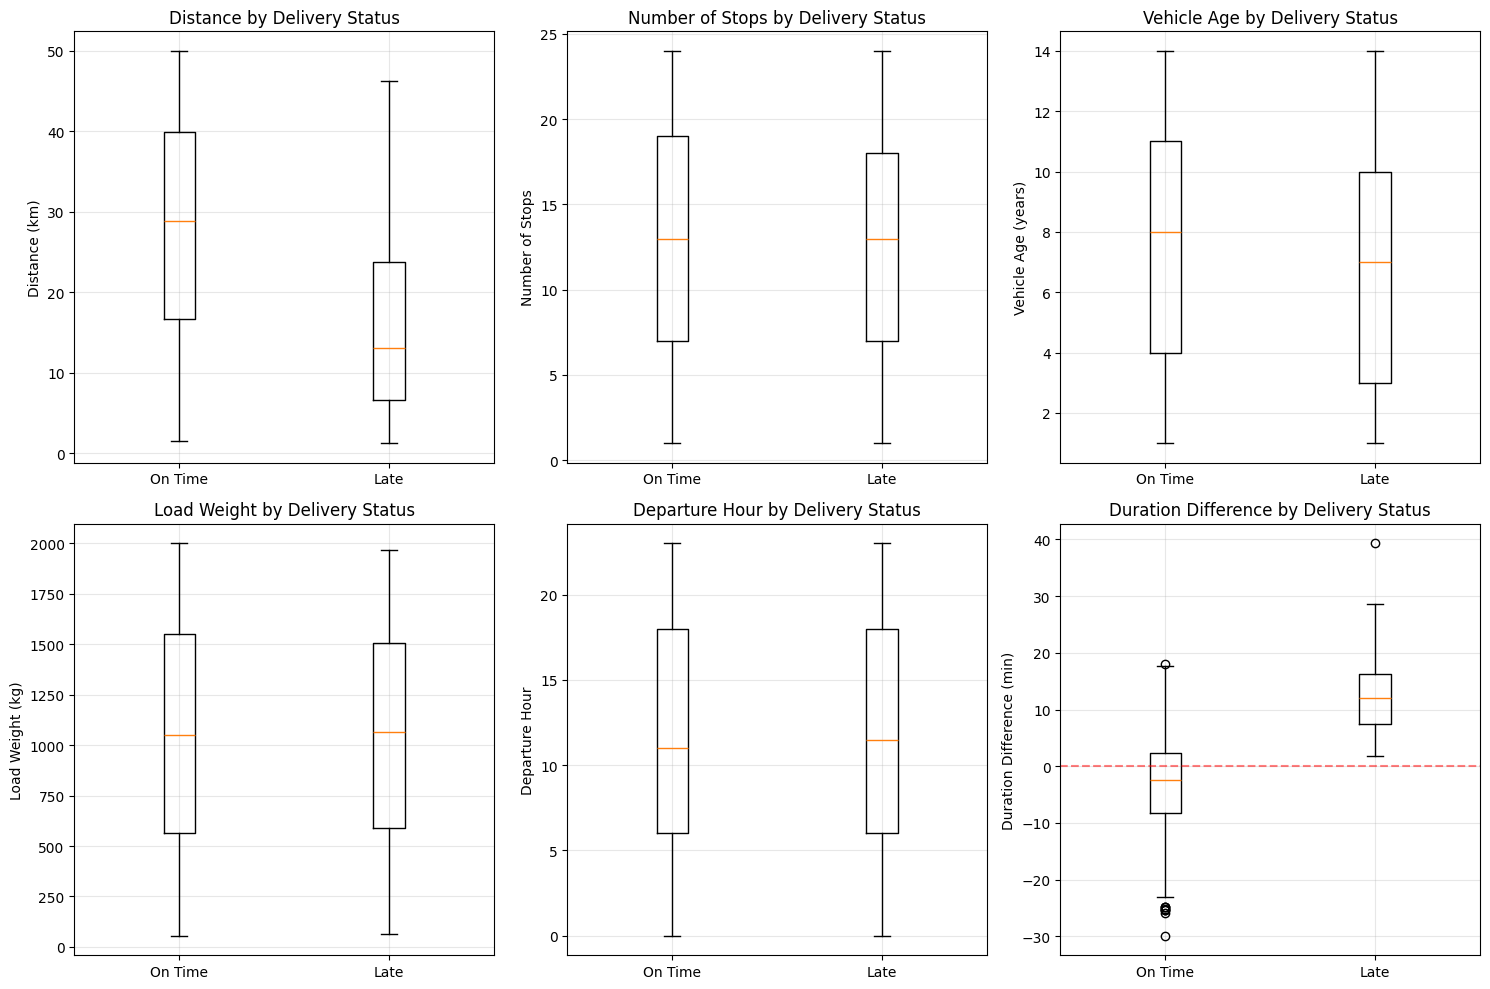

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Distance by delivery status
on_time = delivery_trips[delivery_trips['is_late_delivery'] == 0]
late = delivery_trips[delivery_trips['is_late_delivery'] == 1]

axs[0, 0].boxplot([on_time['distance_km'], late['distance_km']], labels=['On Time', 'Late'])
axs[0, 0].set_ylabel("Distance (km)")
axs[0, 0].set_title("Distance by Delivery Status")
axs[0, 0].grid(True, alpha=0.3)

# Number of stops by delivery status
axs[0, 1].boxplot([on_time['num_stops'], late['num_stops']], labels=['On Time', 'Late'])
axs[0, 1].set_ylabel("Number of Stops")
axs[0, 1].set_title("Number of Stops by Delivery Status")
axs[0, 1].grid(True, alpha=0.3)

# Vehicle age by delivery status
axs[0, 2].boxplot([on_time['vehicle_age_years'], late['vehicle_age_years']], labels=['On Time', 'Late'])
axs[0, 2].set_ylabel("Vehicle Age (years)")
axs[0, 2].set_title("Vehicle Age by Delivery Status")
axs[0, 2].grid(True, alpha=0.3)

# Load weight by delivery status
axs[1, 0].boxplot([on_time['load_weight_kg'], late['load_weight_kg']], labels=['On Time', 'Late'])
axs[1, 0].set_ylabel("Load Weight (kg)")
axs[1, 0].set_title("Load Weight by Delivery Status")
axs[1, 0].grid(True, alpha=0.3)

# Departure hour by delivery status
axs[1, 1].boxplot([on_time['departure_hour'], late['departure_hour']], labels=['On Time', 'Late'])
axs[1, 1].set_ylabel("Departure Hour")
axs[1, 1].set_title("Departure Hour by Delivery Status")
axs[1, 1].grid(True, alpha=0.3)

# Duration difference (actual - estimated)
on_time_diff = on_time['actual_duration_min'] - on_time['estimated_duration_min']
late_diff = late['actual_duration_min'] - late['estimated_duration_min']
axs[1, 2].boxplot([on_time_diff, late_diff], labels=['On Time', 'Late'])
axs[1, 2].set_ylabel("Duration Difference (min)")
axs[1, 2].set_title("Duration Difference by Delivery Status")
axs[1, 2].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axs[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()